# ~Phân Tích Nội Dung Bài Viết SpaceSpeakersCM~

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import ast
from datetime import datetime
from matplotlib.dates import DateFormatter

In [2]:
raw_df = pd.read_csv('Data/SpaceSpeakersCM.csv')
# thêm index cho dataframe
raw_df = raw_df.reset_index(inplace = False)
raw_df["index"] = raw_df["index"] + 1

In [3]:
reaction_df = pd.read_csv('CleanFile/SpaceSpeakersCM_Reaction.csv')
comment_df = pd.read_csv('CleanFile/SpaceSpeakersCM_Comment.csv')

1. Dữ liệu cơ bản của các bài post

In [4]:
# Lấy tất cả bài viết
df_text = raw_df[['post_id','post_text']]
text = str(df_text['post_text'])
df_text

,post_id,post_text
0,910863380635703,TRÒN 1 NĂM DIỄN RA KOSMIK 💥☄️\nMột trải nghiệm...
1,907540044301370,"Space bois & Space girls,\nIts Maroon 5 🔥🔥🔥\nS..."
2,906705411051500,'Đan Xinh In Love' = Nhật kí tình Đan 💕\n\n#Bi...
3,906220787766629,Make Binz Da Poet feel loved 💗\n\n#Binz #Touli...
4,906176837771024,It's Xuân Đan's world and we're just living in...
...,...,...
95,811294883925887,Space Date 3 sẵn sàng vào cuối tuần này 🌪\n\nH...
96,811306187258090,Một sự kết hợp lần đầu tiên 🎸\n\nTouliver x $A...
97,810742723981103,Space Jam Volume 01 - Album Release Event Reca...
98,810747570647285,Space Date #3 is coming ☄️🌪🔥🌟\nNext stop: KTX ...


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          100 non-null    int64  
 1   post_id                        100 non-null    int64  
 2   text                           100 non-null    object 
 3   post_text                      100 non-null    object 
 4   shared_text                    10 non-null     object 
 5   original_text                  0 non-null      float64
 6   time                           100 non-null    object 
 7   timestamp                      100 non-null    int64  
 8   image                          62 non-null     object 
 9   image_lowquality               100 non-null    object 
 10  images                         100 non-null    object 
 11  images_description             100 non-null    object 
 12  images_lowquality              100 non-null    obje

2. Tần xuất đăng bài của page

<Axes: xlabel='date'>

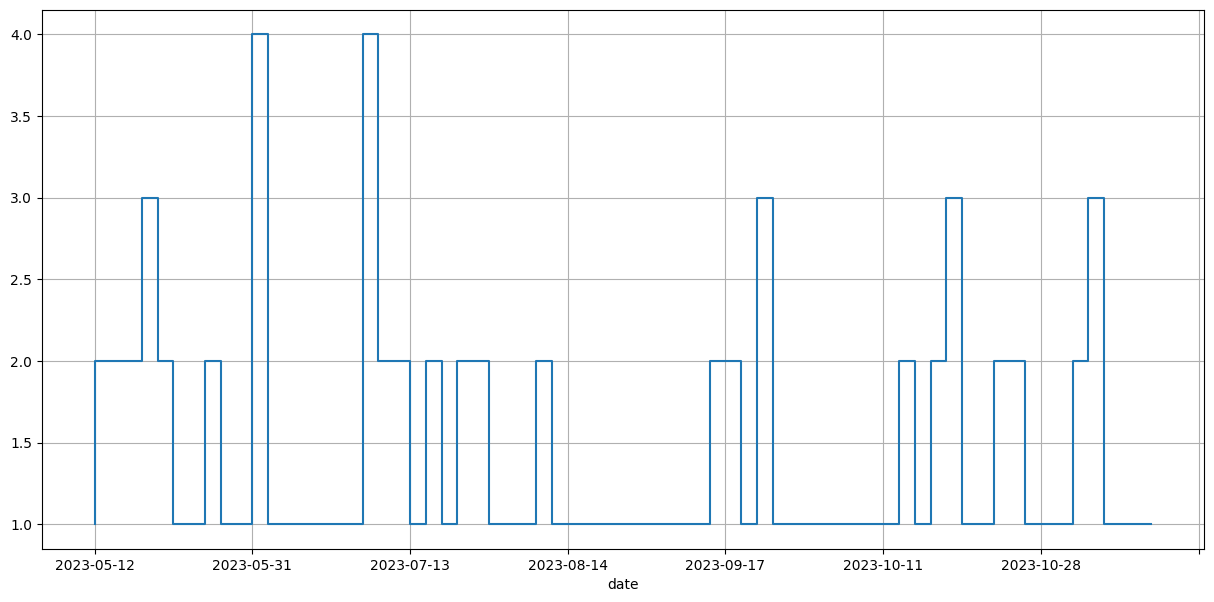

In [6]:
# Số lượng bài đăng theo từng ngày
reaction_df['date'].value_counts().sort_index().plot(kind='line', drawstyle = "steps", grid = True, figsize = (15, 7))

In [7]:
raw_df['time'] = pd.to_datetime(raw_df['time'])
raw_df['Day_name'] = raw_df['time'].dt.day_name()
raw_df['Time_post_hour'] = raw_df['time'].dt.hour
raw_df['post_time'] = raw_df['time'].dt.strftime('%d-%m-%y')

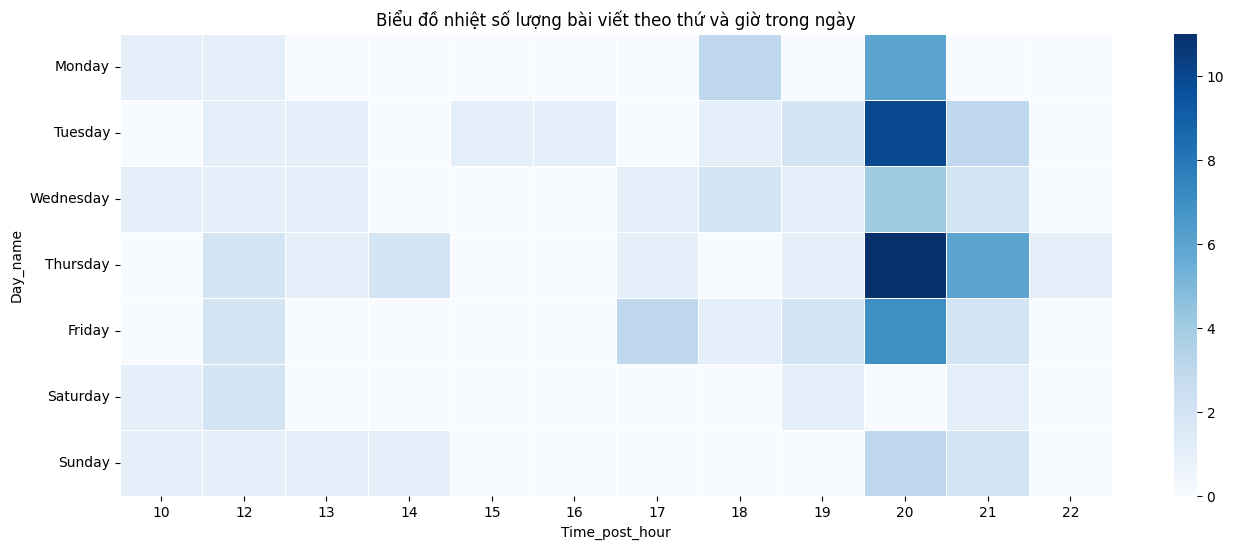

In [8]:
pivot_df = raw_df.pivot_table(index = 'Day_name', columns = 'Time_post_hour', aggfunc = 'size', fill_value = 0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df = pivot_df.reindex(day_order)
plt.figure(figsize=(16, 6))
color_palette = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(pivot_df, cmap=color_palette, annot=False, fmt='d', linewidths=.5)
plt.title('Biểu đồ nhiệt số lượng bài viết theo thứ và giờ trong ngày')
plt.show()

3. Các chủ đề thường được đăng tải

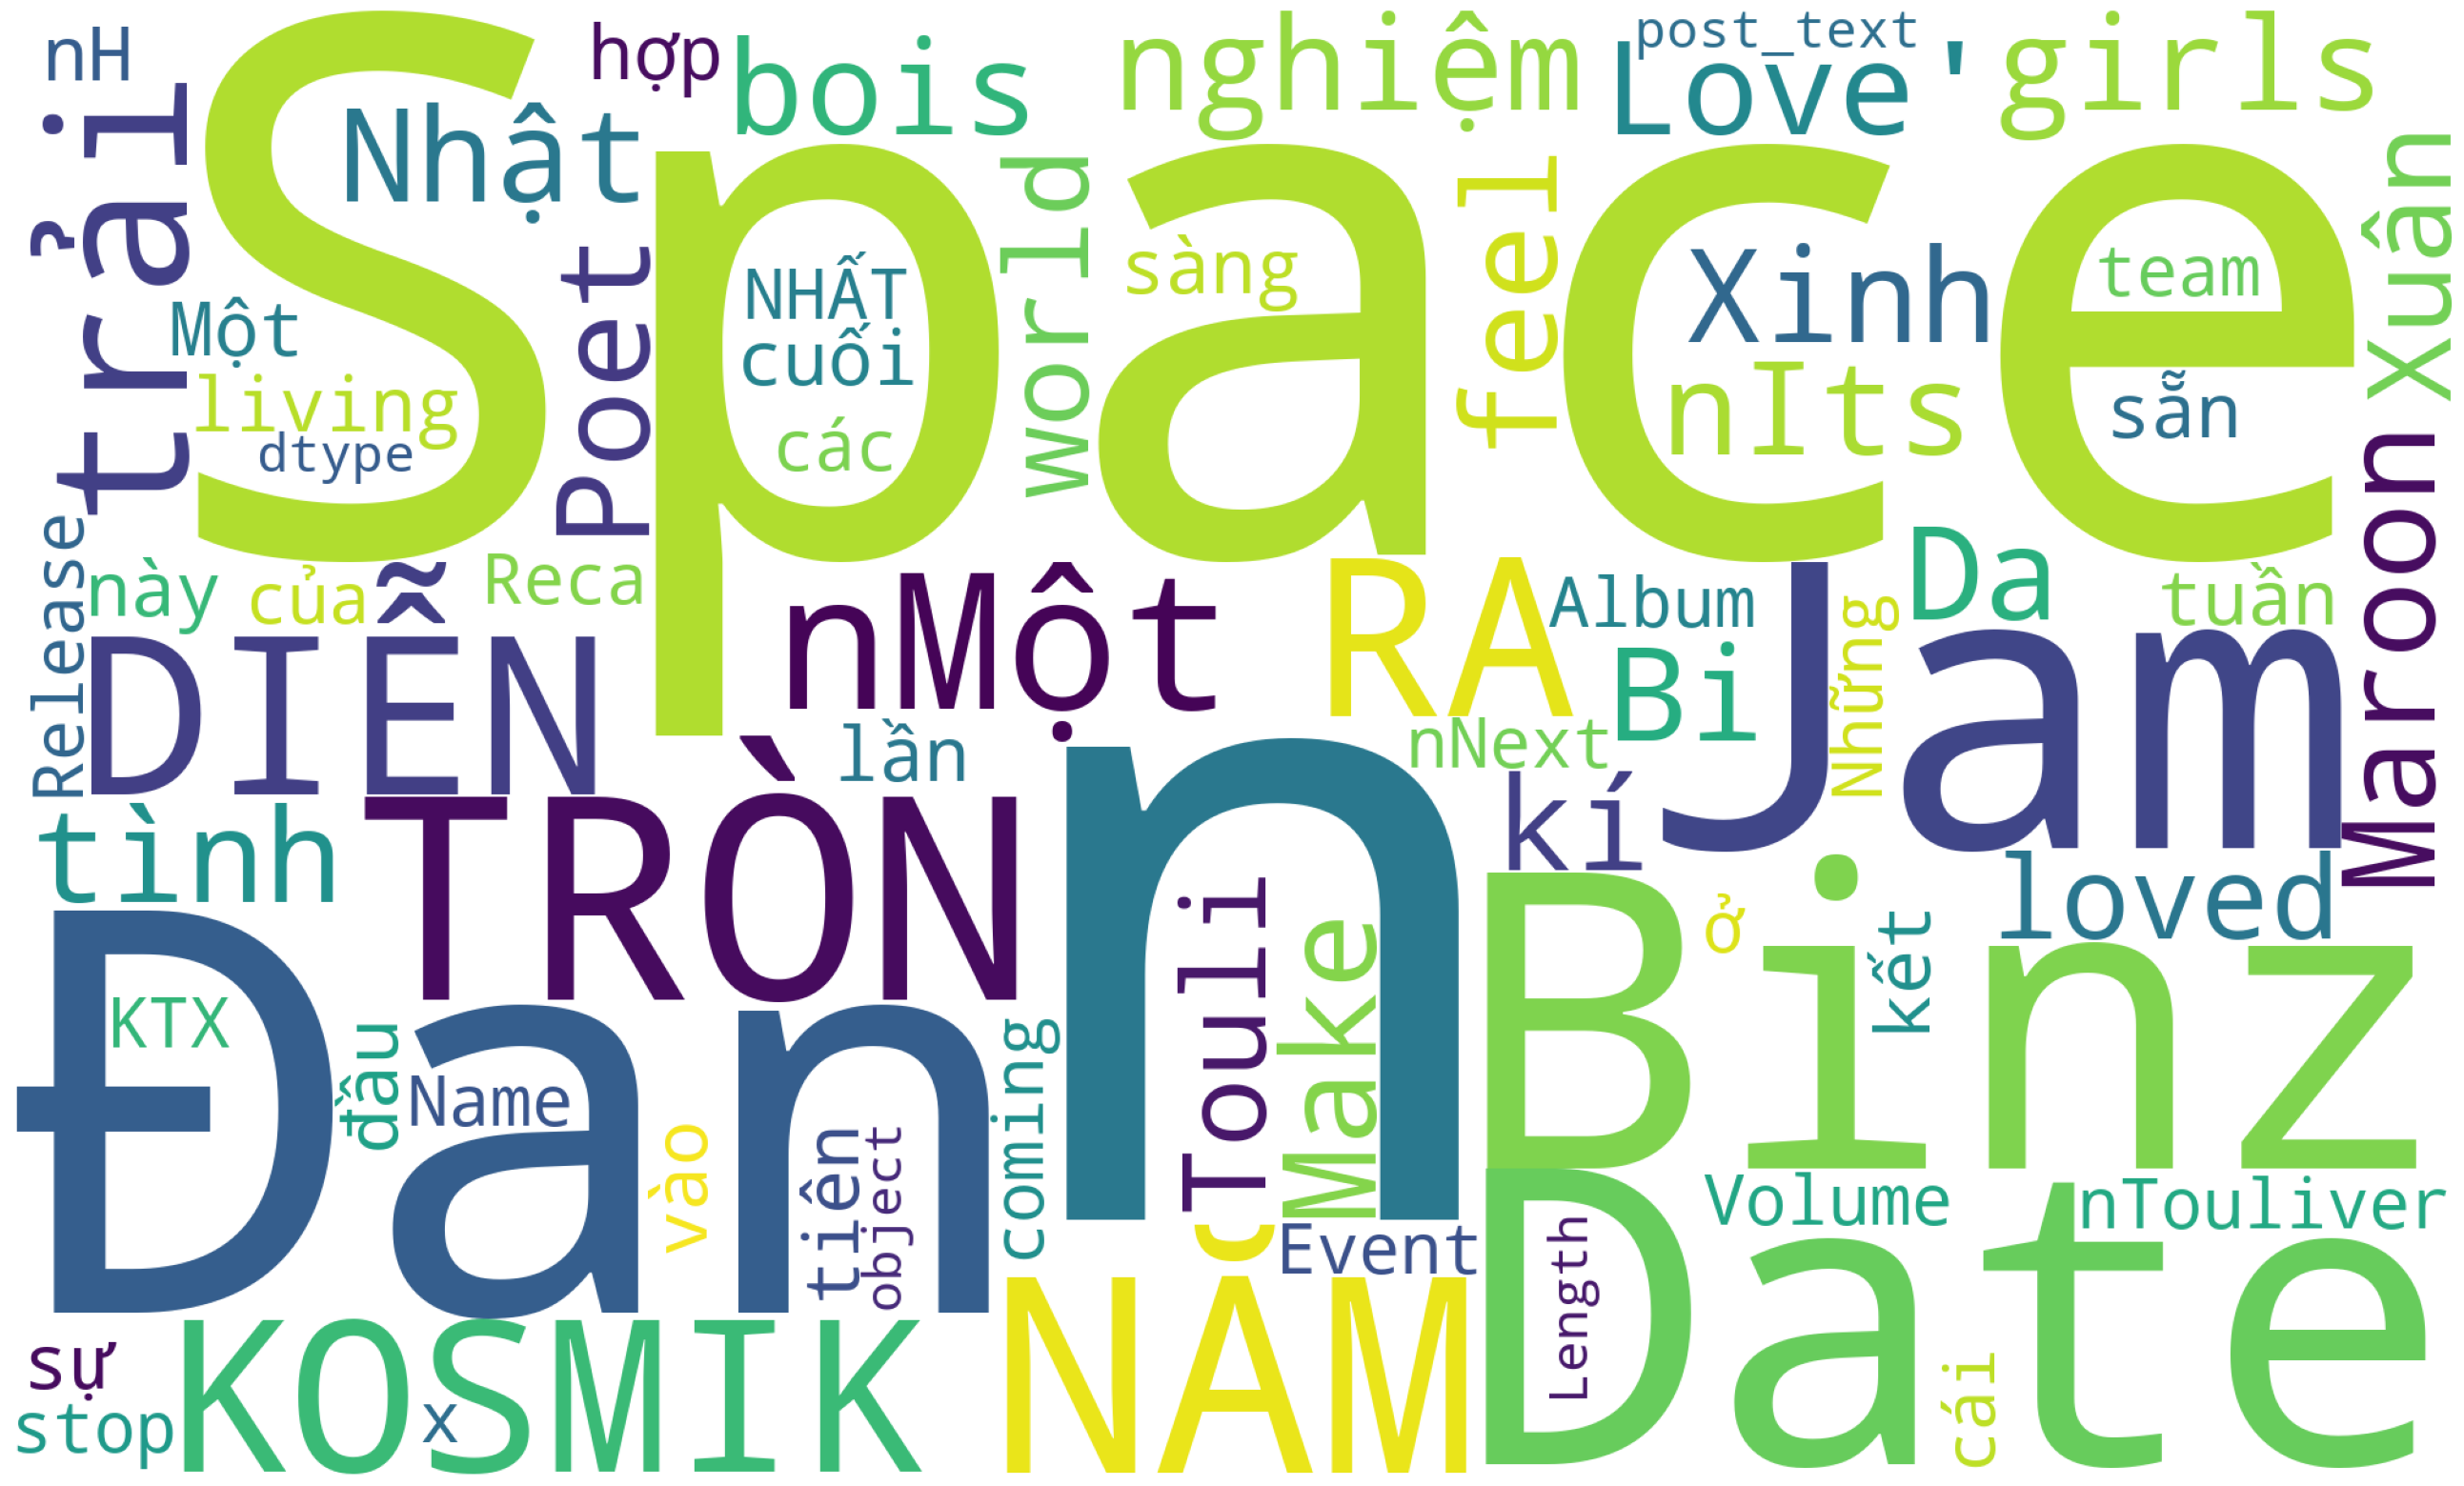

In [9]:
from wordcloud import WordCloud, STOPWORDS
#Tạo wordclould cho page
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
# Tìm các bài viết chứa 1 từ khóa nào đó
keyword = "Binz"
filtered_posts = [post for post in raw_df['post_text'].tolist() if keyword in post]
print('Có {} bài viết chứa từ khóa "Kim Cương" trong tổng số {} bài viết.'.format(len(filtered_posts), len(raw_df)))
filtered_posts

Có 28 bài viết chứa từ khóa "Kim Cương" trong tổng số 100 bài viết.


["'Đan Xinh In Love' = Nhật kí tình Đan 💕\n\n#Binz #Touliver #DanXinhInLove #SSLabel #WarnerMusicVietnam",
 'Make Binz Da Poet feel loved 💗\n\n#Binz #Touliver #DanXinhInLove #SSLabel #WarnerMusicVietnam',
 "It's Xuân Đan's world and we're just living in it 🌈\n\n'Make Me Feel' Official MV và Full EP ‘Đan Xinh In Love’ out now!\n\n#Binz #Touliver #DanXinhInLove #SSLabel #WarnerMusicVietnam",
 "💜 Binz ft. Touliver - 'Make Me Feel' Official MV 💜\n\nTonight at 20:00\n\n#SSLabel #Binz #Touliver #HitMeUp #DanXinhInLove #WarnerMusicVietnam",
 '"Điều tối cao nhất trong cuộc đời nghệ thuật là có thể viết giống mình và hát giống mình"\n\n#Vietcetera #Binz #YeuLanh',
 'Tracklist EP ‘Đan Xinh In Love’ 🕺🏼\n\nOfficial Release\n20:00 - 02.11.2023\nPre-save EP: https://wmvn.lnk.to/DXIL\n\n#Binz #HitMeUp #DanXinhInLove #WarnerMusicVietnam',
 'Đếm xem còn bao ngày để nghe trọn vẹn EP nhỉ? 🎹\n\nEP ‘ĐAN XINH IN LOVE’ (Xuân Đan ft Nomovodka)\n\nOfficial Release\n20:00 - 02.11.2023\nPre-save EP: https://wmvn

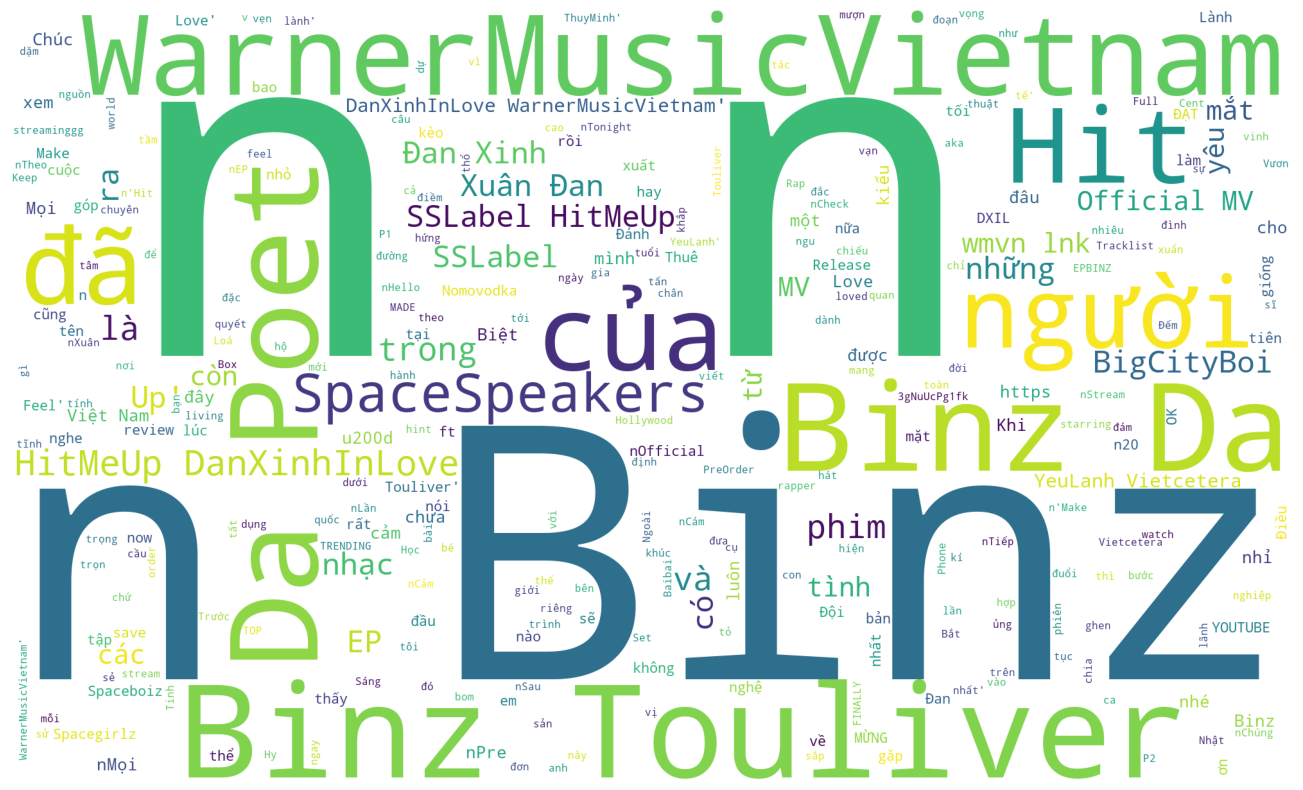

In [11]:
from wordcloud import WordCloud, STOPWORDS
#Tạo wordclould cho các post của nhắc đến Binz
text_binz = str(filtered_posts)

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text_binz)
plt.figure(figsize=(20,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

4. Tổng số bài đăng theo giờ và tổng reaction của những bài đăng

In [12]:
raw_df['time'] = pd.to_datetime(raw_df['time'])
raw_df['hour'] = raw_df['time'].dt.hour
# Tổng số bài viết theo giờ
df_posts_hour = raw_df['hour'].value_counts()
df_posts_hour = df_posts_hour.reindex(range(24), fill_value=0)
df_posts_hour

hour
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     4
11     0
12    10
13     4
14     3
15     1
16     1
17     5
18     7
19     7
20    41
21    16
22     1
23     0
Name: count, dtype: int64

In [13]:
# Tổng số reactions theo giờ
df_reactions_by_hour = raw_df.groupby('hour')['reaction_count'].sum()
# Tạo 24 chỉ số, chỉ số mới có giá trị 0
df_reactions_by_hour = df_reactions_by_hour.reindex(range(24), fill_value=0)

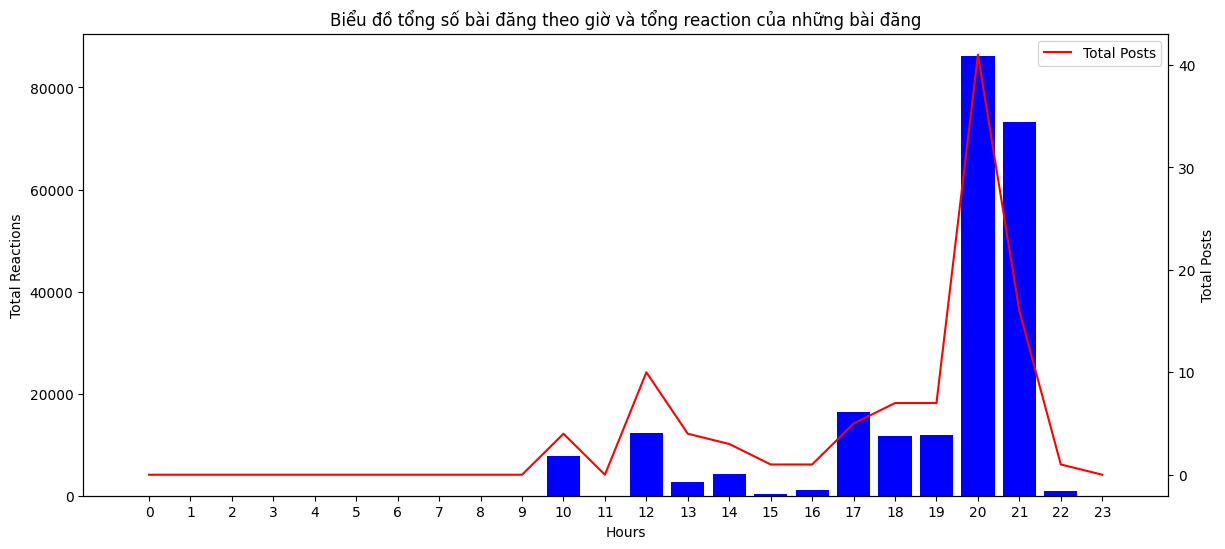

In [14]:
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.bar(df_reactions_by_hour.index, df_reactions_by_hour.values, color='blue', label='Total Reactions')
ax1.set_xticks(df_reactions_by_hour.index)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Total Reactions')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.plot(df_posts_hour.index, df_posts_hour.values, color='red', label='Total Posts')
ax2.set_ylabel('Total Posts')
ax2.tick_params(axis='y')
plt.title('Biểu đồ tổng số bài đăng theo giờ và tổng reaction của những bài đăng')
plt.xlabel('Hours')
plt.legend()
plt.show()